# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data (e.g. you might have a sensor collecting data which might miss some data);
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Data frames are kinda like an excel table. The columns are the "series". Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements (different from np arrays -> only one type of data). Of paramount importance are the time-series, used to define time evolutions of a phenomenon (e.g. climate change predictions, stock exchange...). 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n') # series.label xs.f seems methods but in fact are a way of accessing to indexes
print (xs[['d', 'f', 'h']], '\n') #can also pass a list of indexes. Thin notation makes a series from a series 

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n') #can exponentiate the whole series
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]} 
pd.Series(d) #just pass the dictionary to the constructor


b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and nparray is that operations between Series automatically align the data based on label (operation are based on label!!). Thus, you can write computations without giving consideration to whether the Series involved have the same labels (you'll get NaN).

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
s[1:] + s[:-1]

a         NaN
b    1.932079
c   -1.473147
d    4.020755
e         NaN
dtype: float64

### Time series

We can have data samples with time stamps of a certain type. The format of the timestamp can be of various types. Pandas implements a function that de-codes that. Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today() 
date = dt.datetime(2020,11,9,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 9 2020'
date = '9/11/2020 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D') #7 days starting from today with frequency of a day
print (days) #7 entries separated by a day

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds) #3600 entries separated by a second


2020-11-09 14:45:10.000015
9/11/2020 14:45:00
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-12 14:45:00',
               '2020-09-13 14:45:00', '2020-09-14 14:45:00',
               '2020-09-15 14:45:00', '2020-09-16 14:45:00',
               '2020-09-17 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-11 14:45:01',
               '2020-09-11 14:45:02', '2020-09-11 14:45:03',
               '2020-09-11 14:45:04', '2020-09-11 14:45:05',
               '2020-09-11 14:45:06', '2020-09-11 14:45:07',
               '2020-09-11 14:45:08', '2020-09-11 14:45:09',
               ...
               '2020-09-11 15:44:50', '2020-09-11 15:44:51',
               '2020-09-11 15:44:52', '2020-09-11 15:44:53',
               '2020-09-11 15:44:54', '2020-09-11 15:44:55',
               '2020-09-11 15:44:56', '2020-09-11 15:44:57',
               '2020-09-11 15:44:58', '2020-09-11 15:44:59'],
              dtype='datetime64[ns]', length=3600, fre

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [7]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 1970
# timestamp = by convention, counts of number of nanoseconds passed from 1st January 1970
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print(type(ts))
print(ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print(ts)
print(ts.value)

1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2020-09-11':'2020-11-11'], '\n') # Note - includes end time


2020-09-11 14:45:00     8.483563
2020-09-12 14:45:00     8.186236
2020-09-13 14:45:00    10.774997
2020-09-14 14:45:00    10.041140
Freq: D, dtype: float64 

2020-09-11 14:45:00     8.483563
2020-09-12 14:45:00     8.186236
2020-09-13 14:45:00    10.774997
2020-09-14 14:45:00    10.041140
2020-09-15 14:45:00     9.417379
2020-09-16 14:45:00     9.650189
2020-09-17 14:45:00     9.819264
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06'], dtype='datetime64[ns]', freq=None)

## DataFrame

Pandas can be consider as a more sophisticated version of excel. You still have a table with lables for rows and columns. A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Pandas Series object. You can put together several Series to construct a DataFrame. You need to have the same structure for each feature but some data can be missing: the element corresponding to it will be NaN

The element can be whatever, missing data are dealt with too (as NaN). 

The DataFrame can be as long as the memory allows.

You can read from a file constructed in several ways (excel, txt,...) as long as each record is formatted in the same way.

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [10]:
entries = 10
dates=pd.date_range('11/09/2020 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D']) 
df
#our features are simply A,B,C,... which can be whathever (temperature, pressure, ...)
#our data frame is a 10x4 numpy array
#Every record has its index separated one hour between each other
#Every record is a measurement of 4 features: A,B,C,D 

,A,B,C,D
2020-11-09 14:45:00,0.262620,-1.182615,-0.234127,1.241407
2020-11-09 15:45:00,0.347121,-1.278610,-0.635651,0.672050
2020-11-09 16:45:00,1.138285,-0.627622,-0.966287,0.612069
2020-11-09 17:45:00,0.039767,-0.104016,-1.284345,0.429329
2020-11-09 18:45:00,0.812943,-1.244411,-0.531208,-2.007083
2020-11-09 19:45:00,-0.566567,-0.318777,1.146013,-0.109772
2020-11-09 20:45:00,-0.722248,0.770974,-0.409207,0.430571
2020-11-09 21:45:00,-1.268579,-0.544606,0.212358,-0.334997
2020-11-09 22:45:00,-1.949334,0.904085,-0.541154,1.223310
2020-11-09 23:45:00,-0.856337,-0.729797,0.194434,-0.095774


You can also start from a dictionary:


In [11]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'), #will be extended to length of longest series
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
  

In [12]:
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data
Usually DataFrames are huge (millions of files). Being able to navigate them is fundamental.

In [13]:
df.head(3) #first 3 rows

,A,B,C,D
2020-11-09 14:45:00,0.262620,-1.182615,-0.234127,1.241407
2020-11-09 15:45:00,0.347121,-1.278610,-0.635651,0.672050
2020-11-09 16:45:00,1.138285,-0.627622,-0.966287,0.612069


In [14]:
df.tail(4) #last 4 rows

,A,B,C,D
2020-11-09 20:45:00,-0.722248,0.770974,-0.409207,0.430571
2020-11-09 21:45:00,-1.268579,-0.544606,0.212358,-0.334997
2020-11-09 22:45:00,-1.949334,0.904085,-0.541154,1.223310
2020-11-09 23:45:00,-0.856337,-0.729797,0.194434,-0.095774


In [15]:
df.index #indexes

DatetimeIndex(['2020-11-09 14:45:00', '2020-11-09 15:45:00',
               '2020-11-09 16:45:00', '2020-11-09 17:45:00',
               '2020-11-09 18:45:00', '2020-11-09 19:45:00',
               '2020-11-09 20:45:00', '2020-11-09 21:45:00',
               '2020-11-09 22:45:00', '2020-11-09 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[ 0.26261988, -1.18261541, -0.23412656,  1.24140736],
       [ 0.34712138, -1.27861021, -0.63565108,  0.67205025],
       [ 1.13828501, -0.62762205, -0.96628687,  0.61206898],
       [ 0.03976671, -0.1040157 , -1.28434513,  0.42932921],
       [ 0.81294335, -1.24441086, -0.53120843, -2.00708278],
       [-0.56656727, -0.31877707,  1.14601313, -0.10977227],
       [-0.72224783,  0.77097417, -0.40920741,  0.43057101],
       [-1.26857933, -0.54460628,  0.21235833, -0.33499662],
       [-1.94933431,  0.90408546, -0.54115387,  1.22331022],
       [-0.85633721, -0.7297965 ,  0.19443436, -0.09577448]])

In [18]:
df.describe() #statistical information

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.276233,-0.435539,-0.304917,0.206111
std,0.964349,0.776914,0.687273,0.941074
min,-1.949334,-1.278610,-1.284345,-2.007083
25%,-0.822815,-1.069411,-0.612027,-0.106273
50%,-0.263400,-0.586114,-0.470208,0.429950
75%,0.325996,-0.157706,0.087294,0.657055
max,1.138285,0.904085,1.146013,1.241407


In [19]:
df.T #transpose

,2020-11-09 14:45:00,2020-11-09 15:45:00,2020-11-09 16:45:00,2020-11-09 17:45:00,2020-11-09 18:45:00,2020-11-09 19:45:00,2020-11-09 20:45:00,2020-11-09 21:45:00,2020-11-09 22:45:00,2020-11-09 23:45:00
A,0.262620,0.347121,1.138285,0.039767,0.812943,-0.566567,-0.722248,-1.268579,-1.949334,-0.856337
B,-1.182615,-1.278610,-0.627622,-0.104016,-1.244411,-0.318777,0.770974,-0.544606,0.904085,-0.729797
C,-0.234127,-0.635651,-0.966287,-1.284345,-0.531208,1.146013,-0.409207,0.212358,-0.541154,0.194434
D,1.241407,0.672050,0.612069,0.429329,-2.007083,-0.109772,0.430571,-0.334997,1.223310,-0.095774


In [20]:
df.sort_index(axis=1,ascending=False) #sorting(pick up a given axis: 0 is row, 1 is column)
#Here we sort lables in iverse alphabetical order (ascending false)

,D,C,B,A
2020-11-09 14:45:00,1.241407,-0.234127,-1.182615,0.262620
2020-11-09 15:45:00,0.672050,-0.635651,-1.278610,0.347121
2020-11-09 16:45:00,0.612069,-0.966287,-0.627622,1.138285
2020-11-09 17:45:00,0.429329,-1.284345,-0.104016,0.039767
2020-11-09 18:45:00,-2.007083,-0.531208,-1.244411,0.812943
2020-11-09 19:45:00,-0.109772,1.146013,-0.318777,-0.566567
2020-11-09 20:45:00,0.430571,-0.409207,0.770974,-0.722248
2020-11-09 21:45:00,-0.334997,0.212358,-0.544606,-1.268579
2020-11-09 22:45:00,1.223310,-0.541154,0.904085,-1.949334
2020-11-09 23:45:00,-0.095774,0.194434,-0.729797,-0.856337


In [21]:
df.sort_values(by="C") #sort from smaller to bigger according to C

,A,B,C,D
2020-11-09 17:45:00,0.039767,-0.104016,-1.284345,0.429329
2020-11-09 16:45:00,1.138285,-0.627622,-0.966287,0.612069
2020-11-09 15:45:00,0.347121,-1.278610,-0.635651,0.672050
2020-11-09 22:45:00,-1.949334,0.904085,-0.541154,1.223310
2020-11-09 18:45:00,0.812943,-1.244411,-0.531208,-2.007083
2020-11-09 20:45:00,-0.722248,0.770974,-0.409207,0.430571
2020-11-09 14:45:00,0.262620,-1.182615,-0.234127,1.241407
2020-11-09 23:45:00,-0.856337,-0.729797,0.194434,-0.095774
2020-11-09 21:45:00,-1.268579,-0.544606,0.212358,-0.334997
2020-11-09 19:45:00,-0.566567,-0.318777,1.146013,-0.109772


## Selection
You might want to perform complex operations selecting items in a DataFrame according to boolean conditions.

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [22]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2020-11-09 14:45:00    0.262620
2020-11-09 15:45:00    0.347121
2020-11-09 16:45:00    1.138285
2020-11-09 17:45:00    0.039767
2020-11-09 18:45:00    0.812943
2020-11-09 19:45:00   -0.566567
2020-11-09 20:45:00   -0.722248
2020-11-09 21:45:00   -1.268579
2020-11-09 22:45:00   -1.949334
2020-11-09 23:45:00   -0.856337
Freq: H, Name: A, dtype: float64 

2020-11-09 14:45:00    0.262620
2020-11-09 15:45:00    0.347121
2020-11-09 16:45:00    1.138285
2020-11-09 17:45:00    0.039767
2020-11-09 18:45:00    0.812943
2020-11-09 19:45:00   -0.566567
2020-11-09 20:45:00   -0.722248
2020-11-09 21:45:00   -1.268579
2020-11-09 22:45:00   -1.949334
2020-11-09 23:45:00   -0.856337
Freq: H, Name: A, dtype: float64


In [23]:
# selecting rows by counting
print (df[0:3]) #the first 3 rows (for example to select data in a given time interval)

# or by index
print (df["2020-11-09 14:45:00":"2020-11-09 16:45:00"]) #or you can explicitate the boundaries

                            A         B         C         D
2020-11-09 14:45:00  0.262620 -1.182615 -0.234127  1.241407
2020-11-09 15:45:00  0.347121 -1.278610 -0.635651  0.672050
2020-11-09 16:45:00  1.138285 -0.627622 -0.966287  0.612069
                            A         B         C         D
2020-11-09 14:45:00  0.262620 -1.182615 -0.234127  1.241407
2020-11-09 15:45:00  0.347121 -1.278610 -0.635651  0.672050
2020-11-09 16:45:00  1.138285 -0.627622 -0.966287  0.612069


### Selection by label

In [24]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]] #dates[0] is first record

#.loc[] uses square brackets!!!

A    0.262620
B   -1.182615
C   -0.234127
D    1.241407
Name: 2020-11-09 14:45:00, dtype: float64

In [25]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']] #loc[rows selection,columns selection]  : means all rows, ['A','B'] means just column A,B
a = df.loc[:,['A','B']]

In [26]:
# showing label slicing, both endpoints are included:
df.loc['2020-11-09 18:45:00':'2020-11-09 20:45:00',['A','B']]

,A,B
2020-11-09 18:45:00,0.812943,-1.244411
2020-11-09 19:45:00,-0.566567,-0.318777
2020-11-09 20:45:00,-0.722248,0.770974


In [27]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

0.34712138093456896
0.34712138093456896


### Selecting by position

In [28]:
#iloc doesn't require you to have the labels
#loc returns a COPY!!!!!!!!!
#iloc returns a VIEW!!!!!!!!
# select via the position of the passed integers:
print (df.iloc[2],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2]) #you have an index for the rows(3 to 5) and one for the columns (0 to 2)

A    1.138285
B   -0.627622
C   -0.966287
D    0.612069
Name: 2020-11-09 16:45:00, dtype: float64 

                            A         B
2020-11-09 17:45:00  0.039767 -0.104016
2020-11-09 18:45:00  0.812943 -1.244411


In [29]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]] #can pass a list of indexes you care about

,A,C
2020-11-09 15:45:00,0.347121,-0.635651
2020-11-09 16:45:00,1.138285,-0.966287
2020-11-09 18:45:00,0.812943,-0.531208


In [30]:
#slicing works same ways as numpy array

# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2020-11-09 15:45:00  0.347121 -1.278610 -0.635651  0.672050
2020-11-09 16:45:00  1.138285 -0.627622 -0.966287  0.612069 

                            B         C
2020-11-09 14:45:00 -1.182615 -0.234127
2020-11-09 15:45:00 -1.278610 -0.635651
2020-11-09 16:45:00 -0.627622 -0.966287
2020-11-09 17:45:00 -0.104016 -1.284345
2020-11-09 18:45:00 -1.244411 -0.531208
2020-11-09 19:45:00 -0.318777  1.146013
2020-11-09 20:45:00  0.770974 -0.409207
2020-11-09 21:45:00 -0.544606  0.212358
2020-11-09 22:45:00  0.904085 -0.541154
2020-11-09 23:45:00 -0.729797  0.194434


In [31]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


-1.2786102124424732

### Boolean index

Very powerful way of filtering out data with certain features, for example when you want to eliminate a measure which is not physical but may derive from an error of the sensor. Notation is very similar to numpy arrays.

In [32]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0] #only keep measures in which the feature B is negative 

,A,B,C,D
2020-11-09 20:45:00,-0.722248,0.770974,-0.409207,0.430571
2020-11-09 22:45:00,-1.949334,0.904085,-0.541154,1.223310


In [33]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2020-11-09 14:45:00,0.262620,NaN,NaN,1.241407
2020-11-09 15:45:00,0.347121,NaN,NaN,0.672050
2020-11-09 16:45:00,1.138285,NaN,NaN,0.612069
2020-11-09 17:45:00,0.039767,NaN,NaN,0.429329
2020-11-09 18:45:00,0.812943,NaN,NaN,NaN
2020-11-09 19:45:00,NaN,NaN,1.146013,NaN
2020-11-09 20:45:00,NaN,0.770974,NaN,0.430571
2020-11-09 21:45:00,NaN,NaN,0.212358,NaN
2020-11-09 22:45:00,NaN,0.904085,NaN,1.223310
2020-11-09 23:45:00,NaN,NaN,0.194434,NaN


### Setting

Combination of selection and setting of values

In [34]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0 #set to 0 the 1st element of A

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df)) #set all elements of column D to be a nparray of 5

# defining a brend new column 
df['E'] = np.arange(len(df))*0.5 #now E goes from 0 to 9 at 0.5 steps

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)
#the new column doesn't have to be pre-existent

In [35]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df
#instead of looping you make operations on whole column

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.989055,0.525599,5,0.0,0,1.000000
2020-11-09 15:45:00,2.096809,-0.558068,0.023530,5,0.5,2,0.999962
2020-11-09 16:45:00,-2.205463,-1.091232,-0.720155,5,1.0,4,0.999848
2020-11-09 17:45:00,-0.389331,-0.208163,0.554974,5,1.5,6,0.999657
2020-11-09 18:45:00,-0.286465,-0.583974,-0.362661,5,2.0,8,0.999391
2020-11-09 19:45:00,-0.151296,-0.756876,0.090723,5,2.5,10,0.999048
2020-11-09 20:45:00,1.101048,-0.547562,-1.016649,5,3.0,12,0.998630
2020-11-09 21:45:00,0.460327,0.040823,-0.679256,5,3.5,14,0.998135
2020-11-09 22:45:00,0.587363,0.020706,2.091598,5,4.0,16,0.997564
2020-11-09 23:45:00,0.608035,-1.034908,-0.775919,5,4.5,18,0.996917


In [36]:
# another example of global setting
df2 = df.copy() #the = should return a copy. With copy command you are sure of that
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-0.989055,-0.525599,-5,0.0,0,-1.000000
2020-11-09 15:45:00,-2.096809,-0.558068,-0.023530,-5,-0.5,-2,-0.999962
2020-11-09 16:45:00,-2.205463,-1.091232,-0.720155,-5,-1.0,-4,-0.999848
2020-11-09 17:45:00,-0.389331,-0.208163,-0.554974,-5,-1.5,-6,-0.999657
2020-11-09 18:45:00,-0.286465,-0.583974,-0.362661,-5,-2.0,-8,-0.999391
2020-11-09 19:45:00,-0.151296,-0.756876,-0.090723,-5,-2.5,-10,-0.999048
2020-11-09 20:45:00,-1.101048,-0.547562,-1.016649,-5,-3.0,-12,-0.998630
2020-11-09 21:45:00,-0.460327,-0.040823,-0.679256,-5,-3.5,-14,-0.998135
2020-11-09 22:45:00,-0.587363,-0.020706,-2.091598,-5,-4.0,-16,-0.997564
2020-11-09 23:45:00,-0.608035,-1.034908,-0.775919,-5,-4.5,-18,-0.996917


In [37]:
df #is the same because we made a copy!

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.989055,0.525599,5,0.0,0,1.000000
2020-11-09 15:45:00,2.096809,-0.558068,0.023530,5,0.5,2,0.999962
2020-11-09 16:45:00,-2.205463,-1.091232,-0.720155,5,1.0,4,0.999848
2020-11-09 17:45:00,-0.389331,-0.208163,0.554974,5,1.5,6,0.999657
2020-11-09 18:45:00,-0.286465,-0.583974,-0.362661,5,2.0,8,0.999391
2020-11-09 19:45:00,-0.151296,-0.756876,0.090723,5,2.5,10,0.999048
2020-11-09 20:45:00,1.101048,-0.547562,-1.016649,5,3.0,12,0.998630
2020-11-09 21:45:00,0.460327,0.040823,-0.679256,5,3.5,14,0.998135
2020-11-09 22:45:00,0.587363,0.020706,2.091598,5,4.0,16,0.997564
2020-11-09 23:45:00,0.608035,-1.034908,-0.775919,5,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [38]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(columns=['E prime'])

,A,B,C,D,E,cosine
2020-11-09 14:45:00,0.000000,0.989055,0.525599,5,0.0,1.000000
2020-11-09 15:45:00,2.096809,-0.558068,0.023530,5,0.5,0.999962
2020-11-09 16:45:00,-2.205463,-1.091232,-0.720155,5,1.0,0.999848
2020-11-09 17:45:00,-0.389331,-0.208163,0.554974,5,1.5,0.999657
2020-11-09 18:45:00,-0.286465,-0.583974,-0.362661,5,2.0,0.999391
2020-11-09 19:45:00,-0.151296,-0.756876,0.090723,5,2.5,0.999048
2020-11-09 20:45:00,1.101048,-0.547562,-1.016649,5,3.0,0.998630
2020-11-09 21:45:00,0.460327,0.040823,-0.679256,5,3.5,0.998135
2020-11-09 22:45:00,0.587363,0.020706,2.091598,5,4.0,0.997564
2020-11-09 23:45:00,0.608035,-1.034908,-0.775919,5,4.5,0.996917


In [39]:
# Dropping by rows
# safe and always working
df.drop(df.index[[1,2,3,4]])#

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.989055,0.525599,5,0.0,0,1.000000
2020-11-09 19:45:00,-0.151296,-0.756876,0.090723,5,2.5,10,0.999048
2020-11-09 20:45:00,1.101048,-0.547562,-1.016649,5,3.0,12,0.998630
2020-11-09 21:45:00,0.460327,0.040823,-0.679256,5,3.5,14,0.998135
2020-11-09 22:45:00,0.587363,0.020706,2.091598,5,4.0,16,0.997564
2020-11-09 23:45:00,0.608035,-1.034908,-0.775919,5,4.5,18,0.996917


In [40]:
df #original DataFrame not affected!!

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.989055,0.525599,5,0.0,0,1.000000
2020-11-09 15:45:00,2.096809,-0.558068,0.023530,5,0.5,2,0.999962
2020-11-09 16:45:00,-2.205463,-1.091232,-0.720155,5,1.0,4,0.999848
2020-11-09 17:45:00,-0.389331,-0.208163,0.554974,5,1.5,6,0.999657
2020-11-09 18:45:00,-0.286465,-0.583974,-0.362661,5,2.0,8,0.999391
2020-11-09 19:45:00,-0.151296,-0.756876,0.090723,5,2.5,10,0.999048
2020-11-09 20:45:00,1.101048,-0.547562,-1.016649,5,3.0,12,0.998630
2020-11-09 21:45:00,0.460327,0.040823,-0.679256,5,3.5,14,0.998135
2020-11-09 22:45:00,0.587363,0.020706,2.091598,5,4.0,16,0.997564
2020-11-09 23:45:00,0.608035,-1.034908,-0.775919,5,4.5,18,0.996917


In [41]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2018-11-19 22:45:00"))

KeyError: "[Timestamp('2018-11-19 22:45:00')] not found in axis"

## Missing data

Pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [42]:
df_wNan = df[df>0] #select only positive values
df_wNan #you get a dataframe of same shape but with NaN when its missing (but its actually empty)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,0.989055,0.525599,5,NaN,NaN,1.000000
2020-11-09 15:45:00,2.096809,NaN,0.023530,5,0.5,2.0,0.999962
2020-11-09 16:45:00,NaN,NaN,NaN,5,1.0,4.0,0.999848
2020-11-09 17:45:00,NaN,NaN,0.554974,5,1.5,6.0,0.999657
2020-11-09 18:45:00,NaN,NaN,NaN,5,2.0,8.0,0.999391
2020-11-09 19:45:00,NaN,NaN,0.090723,5,2.5,10.0,0.999048
2020-11-09 20:45:00,1.101048,NaN,NaN,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.460327,0.040823,NaN,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.587363,0.020706,2.091598,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.608035,NaN,NaN,5,4.5,18.0,0.996917


In [43]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2020-11-09 22:45:00,0.587363,0.020706,2.091598,5,4.0,16.0,0.997564


In [44]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,True,False,False,False,True,True,False
2020-11-09 15:45:00,False,True,False,False,False,False,False
2020-11-09 16:45:00,True,True,True,False,False,False,False
2020-11-09 17:45:00,True,True,False,False,False,False,False
2020-11-09 18:45:00,True,True,True,False,False,False,False
2020-11-09 19:45:00,True,True,False,False,False,False,False
2020-11-09 20:45:00,False,True,True,False,False,False,False
2020-11-09 21:45:00,False,False,True,False,False,False,False
2020-11-09 22:45:00,False,False,False,False,False,False,False
2020-11-09 23:45:00,False,True,True,False,False,False,False


In [45]:
# filling missing data
df_wNan.fillna(value=0) #can be useful to substitute NaN with something specified

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.989055,0.525599,5,0.0,0.0,1.000000
2020-11-09 15:45:00,2.096809,0.000000,0.023530,5,0.5,2.0,0.999962
2020-11-09 16:45:00,0.000000,0.000000,0.000000,5,1.0,4.0,0.999848
2020-11-09 17:45:00,0.000000,0.000000,0.554974,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.000000,0.000000,0.000000,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.000000,0.000000,0.090723,5,2.5,10.0,0.999048
2020-11-09 20:45:00,1.101048,0.000000,0.000000,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.460327,0.040823,0.000000,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.587363,0.020706,2.091598,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.608035,0.000000,0.000000,5,4.5,18.0,0.996917


You can even extrapolate missing data. e.g. if a column only has 21 and then NaN its highly likely that the missing data is still 21. Fill gaps forward or backward by propagating non-NA values forward or backward:

VERY DANGEROUS METHOD!!! BE CAREFUL

In [46]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,0.989055,0.525599,5,NaN,NaN,1.000000
2020-11-09 15:45:00,2.096809,0.989055,0.023530,5,0.5,2.0,0.999962
2020-11-09 16:45:00,2.096809,0.989055,0.023530,5,1.0,4.0,0.999848
2020-11-09 17:45:00,2.096809,0.989055,0.554974,5,1.5,6.0,0.999657
2020-11-09 18:45:00,2.096809,0.989055,0.554974,5,2.0,8.0,0.999391
2020-11-09 19:45:00,2.096809,0.989055,0.090723,5,2.5,10.0,0.999048
2020-11-09 20:45:00,1.101048,0.989055,0.090723,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.460327,0.040823,0.090723,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.587363,0.020706,2.091598,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.608035,0.020706,2.091598,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [47]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n') #mean of all variables
# columns
print (df.mean(axis=1),'\n') #mean along rows (not very meaningful in this case!)

A          0.182103
B         -0.373020
C         -0.026822
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2020-11-09 14:45:00    1.073522
2020-11-09 15:45:00    1.437462
2020-11-09 16:45:00    0.997571
2020-11-09 17:45:00    1.922448
2020-11-09 18:45:00    2.109470
2020-11-09 19:45:00    2.525943
2020-11-09 20:45:00    2.933638
2020-11-09 21:45:00    3.331433
2020-11-09 22:45:00    4.099604
2020-11-09 23:45:00    3.899161
Freq: H, dtype: float64 



In [48]:
# global operations on columns
df.apply(np.cumsum) #cumulative sum 

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.989055,0.525599,5,0.0,0,1.000000
2020-11-09 15:45:00,2.096809,0.430987,0.549129,10,0.5,2,1.999962
2020-11-09 16:45:00,-0.108654,-0.660245,-0.171027,15,1.5,6,2.999810
2020-11-09 17:45:00,-0.497985,-0.868408,0.383947,20,3.0,12,3.999467
2020-11-09 18:45:00,-0.784449,-1.452382,0.021287,25,5.0,20,4.998858
2020-11-09 19:45:00,-0.935745,-2.209258,0.112010,30,7.5,30,5.997906
2020-11-09 20:45:00,0.165303,-2.756820,-0.904639,35,10.5,42,6.996536
2020-11-09 21:45:00,0.625630,-2.715997,-1.583895,40,14.0,56,7.994670
2020-11-09 22:45:00,1.212993,-2.695292,0.507703,45,18.0,72,8.992234
2020-11-09 23:45:00,1.821028,-3.730199,-0.268216,50,22.5,90,9.989152


In [49]:
df #its a copy! original not modified

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.989055,0.525599,5,0.0,0,1.000000
2020-11-09 15:45:00,2.096809,-0.558068,0.023530,5,0.5,2,0.999962
2020-11-09 16:45:00,-2.205463,-1.091232,-0.720155,5,1.0,4,0.999848
2020-11-09 17:45:00,-0.389331,-0.208163,0.554974,5,1.5,6,0.999657
2020-11-09 18:45:00,-0.286465,-0.583974,-0.362661,5,2.0,8,0.999391
2020-11-09 19:45:00,-0.151296,-0.756876,0.090723,5,2.5,10,0.999048
2020-11-09 20:45:00,1.101048,-0.547562,-1.016649,5,3.0,12,0.998630
2020-11-09 21:45:00,0.460327,0.040823,-0.679256,5,3.5,14,0.998135
2020-11-09 22:45:00,0.587363,0.020706,2.091598,5,4.0,16,0.997564
2020-11-09 23:45:00,0.608035,-1.034908,-0.775919,5,4.5,18,0.996917


In [50]:
df.apply(lambda x: x.max() - x.min()) #can use lambda functions (here to get difference between min and max of each variable) 

A           4.302271
B           2.080288
C           3.108247
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [51]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B'] #sum two columns elementwise

2020-11-09 14:45:00    0.989055
2020-11-09 15:45:00    1.538741
2020-11-09 16:45:00   -3.296695
2020-11-09 17:45:00   -0.597493
2020-11-09 18:45:00   -0.870439
2020-11-09 19:45:00   -0.908172
2020-11-09 20:45:00    0.553486
2020-11-09 21:45:00    0.501150
2020-11-09 22:45:00    0.608068
2020-11-09 23:45:00   -0.426873
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [52]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/
file_name="data_000637.txt"
data=pd.read_csv(file_name)
data
#huge file of more than a million entries

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [53]:
# the one-liner killing it all 
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25 #gotta go faaast
#performed istantaneously over more than a million data
#they look istantaneous but of course as the entries increase the computation time does as well 
#(linearly but with small slope)

In [54]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [5]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)
#performed by looping will take forever

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding raws) is straightforward


In [56]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-2.608363,1.209021,-0.469534,-0.467271
1,-0.805114,-0.518487,0.332702,-1.159263
2,-0.853128,-1.148306,0.965115,-2.809895
3,1.340078,-0.926131,1.739302,0.090136
4,-0.921714,-0.593326,-1.537354,-1.720529
5,0.813940,2.718443,-0.220536,0.098651
6,-1.681111,0.426224,-2.151274,0.896205
7,-0.565019,0.686868,0.659855,1.390978
8,-1.000972,0.108960,0.781264,-0.450062
9,-0.210411,-1.110606,-0.175949,-1.470648


In [57]:
# divide it into pieaces row-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -2.608363  1.209021 -0.469534 -0.467271
 1 -0.805114 -0.518487  0.332702 -1.159263
 2 -0.853128 -1.148306  0.965115 -2.809895,
           0         1         2         3
 3  1.340078 -0.926131  1.739302  0.090136
 4 -0.921714 -0.593326 -1.537354 -1.720529
 5  0.813940  2.718443 -0.220536  0.098651
 6 -1.681111  0.426224 -2.151274  0.896205,
           0         1         2         3
 7 -0.565019  0.686868  0.659855  1.390978
 8 -1.000972  0.108960  0.781264 -0.450062
 9 -0.210411 -1.110606 -0.175949 -1.470648]

In [60]:
# put it back together (by index)
pd.concat(pieces)

# indexes can be ignored
#pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-2.608363,1.209021,-0.469534,-0.467271
1,-0.805114,-0.518487,0.332702,-1.159263
2,-0.853128,-1.148306,0.965115,-2.809895
3,1.340078,-0.926131,1.739302,0.090136
4,-0.921714,-0.593326,-1.537354,-1.720529
5,0.813940,2.718443,-0.220536,0.098651
6,-1.681111,0.426224,-2.151274,0.896205
7,-0.565019,0.686868,0.659855,1.390978
8,-1.000972,0.108960,0.781264,-0.450062
9,-0.210411,-1.110606,-0.175949,-1.470648


In [61]:
# appending a single raw (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)


,0,1,2,3
0,-2.608363,1.209021,-0.469534,-0.467271
1,-0.805114,-0.518487,0.332702,-1.159263
2,-0.853128,-1.148306,0.965115,-2.809895
3,1.340078,-0.926131,1.739302,0.090136
4,-0.921714,-0.593326,-1.537354,-1.720529
5,0.813940,2.718443,-0.220536,0.098651
6,-1.681111,0.426224,-2.151274,0.896205
7,-0.565019,0.686868,0.659855,1.390978
8,-1.000972,0.108960,0.781264,-0.450062
9,-0.210411,-1.110606,-0.175949,-1.470648


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [137]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

In might want to perform a certain operation on certain data-sets.
By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria (not an actual splitting where you create a copy)
* Applying a function to each group independently
* Combining the results into a data structure


In [62]:
#let's create a simple dataset with 4 features (2 are strings, 2 are rand numb)
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,0.199674,0.182530
1,bar,one,2.032966,-0.376929
2,foo,two,-1.994284,0.011993
3,bar,three,-0.745320,0.170661
4,foo,two,1.924990,-0.397121
5,bar,two,-0.165673,0.283675
6,foo,one,-2.001775,0.368047
7,foo,three,-2.466431,1.105461


In [139]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum() 
#allows to sum as groups: you sum foos and bars together! 
#(B is not there because summing a string makes no sense)

,C,D
A,,
bar,2.217340,0.821532
foo,-0.057098,2.110337


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [140]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           codes=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second']) 

first  second
bar    one      -2.602919
       two       0.447801
baz    one      -1.217734
       two       0.692530
foo    one      -0.211018
       two       2.207681
qux    one      -0.379891
       two      -1.060521
dtype: float64


In [63]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()
#basically I group by A (bar and foo) and then by B (one,two,three) creating  nested structure

C         D
A   B                        
bar one    2.032966 -0.376929
    three -0.745320  0.170661
    two   -0.165673  0.283675
foo one   -1.802101  0.550577
    three -2.466431  1.105461
    two   -0.069294 -0.385128

In [64]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()
#gets rid of a column by creatng a sub-category in the previous one

A    B       
bar  one    C    2.032966
            D   -0.376929
     three  C   -0.745320
            D    0.170661
     two    C   -0.165673
            D    0.283675
foo  one    C   -1.802101
            D    0.550577
     three  C   -2.466431
            D    1.105461
     two    C   -0.069294
            D   -0.385128
dtype: float64

## Plotting

Just a preview, more on the next lab class!
Pandas takes everything from mathpolotlib, it does not actually have anything for plotting per se.

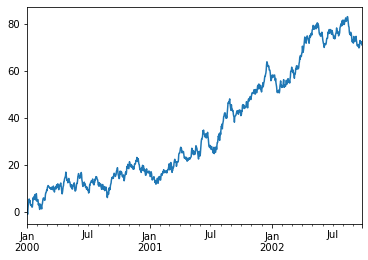

In [65]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

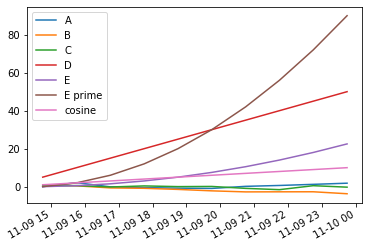

In [67]:
import matplotlib.pyplot as plt

df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best') #im plotting df 

<Figure size 432x288 with 0 Axes>

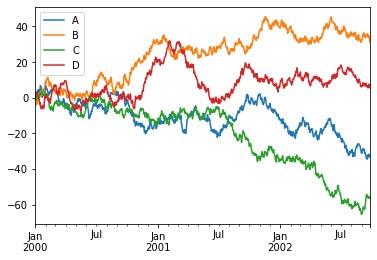

In [68]:
pdf = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
#create a new dataframe
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')